#  Investigation on a claim about the blue cars from the Autolib dataset.

## Reading the data


In [ ]:
# Importing all important libraries in context to our research.
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [ ]:
# loading our data sets
#
# data url = 'http://bit.ly/DSCoreAutolibDataset'
df_autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
print(df_autolib)

       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
0            75001   1/1/2018  ...               22               20
1            75001   1/2/2018  ...               23               22
2            75001   1/3/2018  ...               27               27
3            75001   1/4/2018  ...               25               21
4            75001   1/5/2018  ...               18               20
...            ...        ...  ...              ...              ...
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0
16084        95880  6/19/2018  ...                0                0

[16085 rows x 13 columns]


## Checking the Data

In [ ]:
# Determining the no. of records in our dataset
df_autolib.shape

(16085, 13)

In [ ]:
# previewing the bottom of our dataset
df_autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Checking whether each column has an appropriate datatype
df_autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

## Tidying the datasets

In [ ]:
# Checking our columns
df_autolib.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
#Dropping unncecessary columns.
# we need data on the blue cars so the columns being dropped are not quite relevant
columns = ['Slots_freed_sum','Slots_taken_sum', 'Utilib_14_returned_sum', 'Utilib_14_taken_sum', 'Utilib_returned_sum', 'Utilib_taken_sum' ]
df_autolib = df_autolib.drop(columns, axis=1)
df_autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [ ]:
#cleaning data using strip(),lower(), replace()
df_autolib.columns = df_autolib.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
# checking for missing values
df_autolib.isnull().sum()

postal_code              0
date                     0
n_daily_data_points      0
dayofweek                0
day_type                 0
bluecars_taken_sum       0
bluecars_returned_sum    0
dtype: int64

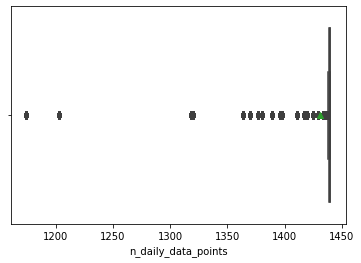

In [ ]:
# checking for outliers
# in the daily data points column
sns.boxplot(x=df_autolib['n_daily_data_points'], showmeans=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


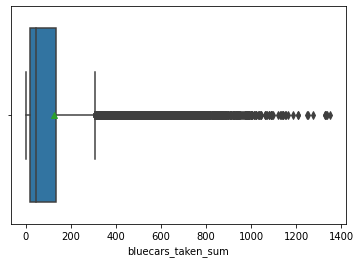

In [ ]:
# checking for outliers in the BlueCars_taken_sum
sns.boxplot(df_autolib['bluecars_taken_sum'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


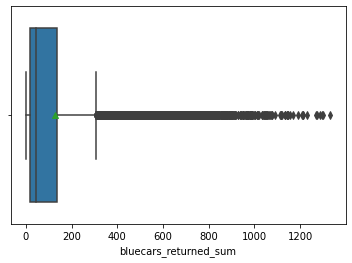

In [ ]:
#checking for outliers in the bluecars_returned_sum
sns.boxplot(df_autolib['bluecars_returned_sum'], showmeans=True)

In [ ]:
# removing the outliers/anomalies using the interquatile ranges formula to have 
# a more sensible data set.

Q1 = df_autolib.quantile(0.25)
Q3 = df_autolib.quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Checking for duplicates
df_autolib.duplicated().sum()

# there are no duplicates

0

In [ ]:
df_autolib.to_csv("autolib_dataset.csv")

## Exploratory analysis

### Univariate Analysis 

In [ ]:
# preview our dataset
df_autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [ ]:
df_autolib.shape

(16085, 7)

In [ ]:
# Ploting the univariate summaries and recording our observations
#
df_autolib.describe(include='all')

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN
top,NaN,5/25/2018,NaN,NaN,weekday,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000


In [ ]:
# Creating our frequency table using value counts
# ---
df_autolib.bluecars_taken_sum.value_counts()

12      261
14      253
9       247
11      246
13      238
       ... 
833       1
825       1
809       1
801       1
1335      1
Name: bluecars_taken_sum, Length: 932, dtype: int64

In [ ]:
df_autolib.dayofweek.value_counts()

0    2374
1    2363
6    2274
4    2271
3    2268
2    2268
5    2267
Name: dayofweek, dtype: int64

In [ ]:
# Creating our frequency table using value counts
#
df_autolib.bluecars_returned_sum.value_counts()

13      260
12      254
10      249
9       243
11      242
       ... 
556       1
588       1
604       1
628       1
1287      1
Name: bluecars_returned_sum, Length: 929, dtype: int64

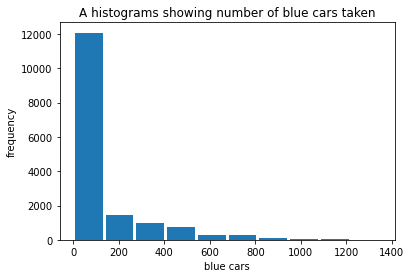

In [ ]:
# Plotting a histogram of blue cars taken which day of the week
bluecars_taken = df_autolib['bluecars_taken_sum']
plt.hist(bluecars_taken, histtype='bar', rwidth=0.9)
plt.title('A histograms showing number of blue cars taken')
plt.xlabel('blue cars')
plt.ylabel('frequency')
plt.show()


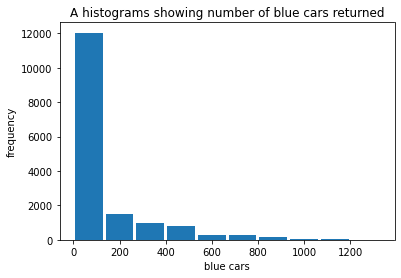

In [ ]:
# Plotting a histogram of blue cars taken which day of the week
bluecars_taken = df_autolib['bluecars_returned_sum']
plt.hist(bluecars_taken, histtype='bar', rwidth=0.9)
plt.title('A histograms showing number of blue cars returned')
plt.xlabel('blue cars')
plt.ylabel('frequency')
plt.show()

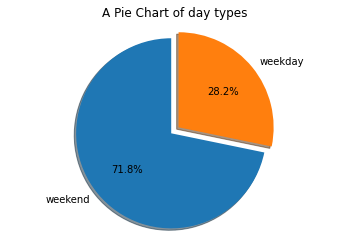

In [ ]:
#Create a pie chart to indicate the day_type column
column= df_autolib.day_type.value_counts()


# accessing the data to plot

# labels
label= ['weekend','weekday']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of day types')
plt.show()

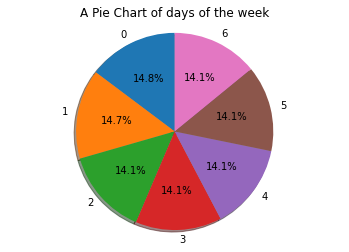

In [ ]:
#Create a pie chart to indicate the day_type column
column= df_autolib.dayofweek.value_counts()


# accessing the data to plot

# labels
label= ['0','1','2','3','4','5','6']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of days of the week')
plt.show()

#### Measures of central tendancies

In [ ]:
# Mean, and mode of blue cars taken
print(df_autolib['bluecars_taken_sum'].mean())
print(df_autolib['bluecars_taken_sum'].mode())
print(df_autolib['bluecars_taken_sum'].max())
print(df_autolib['bluecars_taken_sum'].min())

125.92695057506994
0    12
dtype: int64
1352
0


In [ ]:
# Mean and mode of bluecars returned
print(df_autolib['bluecars_returned_sum'].mean())
print(df_autolib['bluecars_returned_sum'].mode())
print(df_autolib['bluecars_returned_sum'].max())
print(df_autolib['bluecars_returned_sum'].min())

125.912713708424
0    13
dtype: int64
1332
0


In [ ]:
# mode of the day type
print(df_autolib['day_type'].mode())

0    weekday
dtype: object


In [ ]:
# mode of day of week
print(df_autolib['dayofweek'].mode())

0 was the most common day of the weeek

0    0
dtype: int64


In [ ]:
#Calculate quantiles
quantile_taken = df_autolib['bluecars_taken_sum'].quantile([0.25,0.5,0.75])
print(quantile_taken)

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64


In [ ]:
#Calculate quantiles
quantile_returned = df_autolib['bluecars_returned_sum'].quantile([0.25,0.5,0.75])
print(quantile_returned)

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64


In [ ]:

#Calculating measures of dispersion


st_dev = df_autolib.bluecars_taken_sum.std()
print('Standard Deviation:' ,st_dev)
var = df_autolib.bluecars_taken_sum.var()
print('Variance:', var)
skew = df_autolib.bluecars_taken_sum.skew()
print('Skewness:', skew)
kurt = df_autolib.bluecars_taken_sum.kurtosis()
print('Kurtosis:',kurt)

Standard Deviation: 185.42657876727893
Variance: 34383.01611333789
Skewness: 2.4063548974959086
Kurtosis: 6.172692305510042


In [ ]:

#Calculating measures of dispersion


st_dev = df_autolib.bluecars_returned_sum.std()
print('Standard Deviation:' ,st_dev)
var = df_autolib.bluecars_returned_sum.var()
print('Variance:', var)
skew = df_autolib.bluecars_returned_sum.skew()
print('Skewness:', skew)
kurt = df_autolib.bluecars_returned_sum.kurtosis()
print('Kurtosis:',kurt)

Standard Deviation: 185.50153480148427
Variance: 34410.819413706275
Skewness: 2.412084978838923
Kurtosis: 6.1862880957582345


In [ ]:
# correlation
df_autolib.corr()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum
postal_code,1.000000,0.000432,0.000343,-0.698020,-0.697519
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063
dayofweek,0.000343,0.002039,1.000000,0.079649,0.081954
bluecars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660
bluecars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000


### Bivariate Analysis

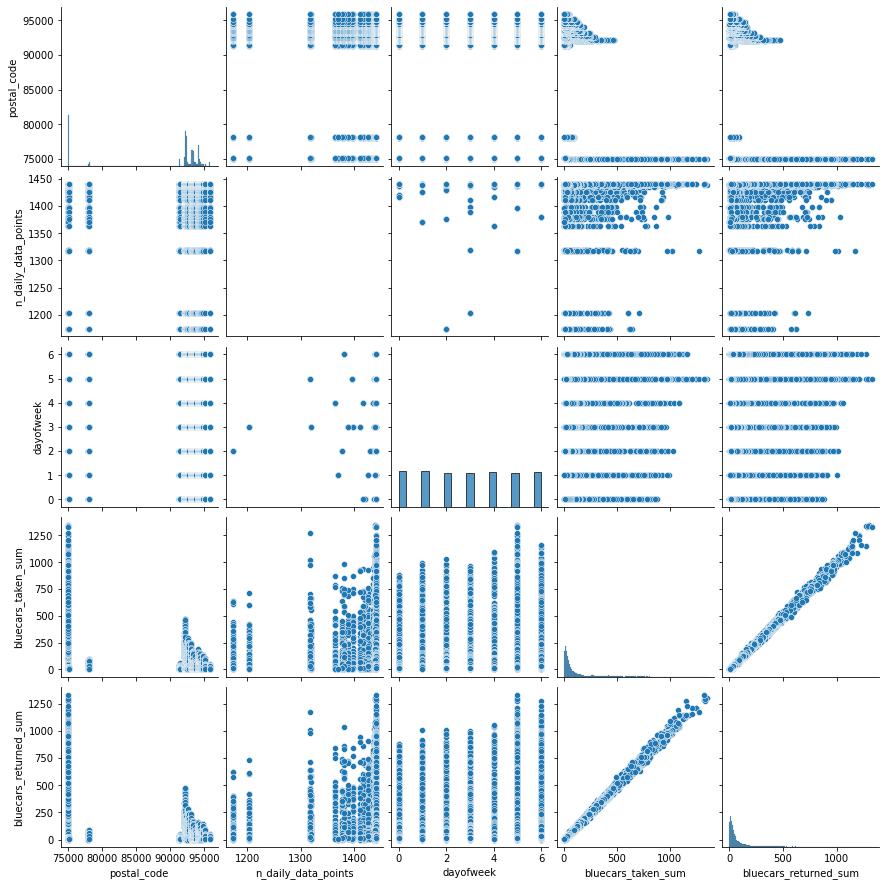

In [ ]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(df_autolib)
plt.show()

# pair plots of differnt columns in the dataset

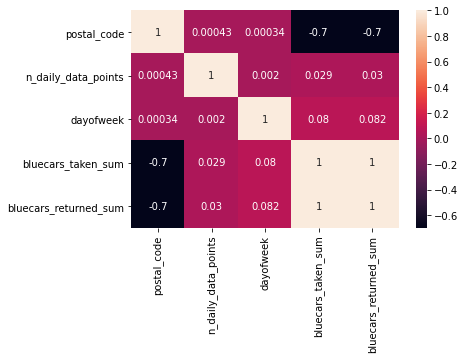

In [ ]:
sns.heatmap(df_autolib.corr(),annot=True)
plt.show()

# A heat map showing the different correlations

In [ ]:
# Previewing our dataset
df_autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [ ]:
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong.
# calculating pearson coefficient
# between postal code and bluecars taken
df_autolib["postal_code"].corr(df_autolib["bluecars_taken_sum"], method="pearson") 

-0.6980199787851211

In [ ]:
# calculating pearson coefficient
# between postal code and bluecars returned
df_autolib["postal_code"].corr(df_autolib["bluecars_returned_sum"], method="pearson") 

-0.6975194190809514

In [ ]:
# correlation between day of week and the bluecars taken
df_autolib['dayofweek'].corr(df_autolib['bluecars_taken_sum'], method='pearson')

0.07964926759308409

In [ ]:
# correlation btwn day of week and cars returned
df_autolib['dayofweek'].corr(df_autolib['bluecars_returned_sum'], method='pearson')

0.08195445794154736

day_type  bluecars_taken_sum
weekday   12                    0.018105
          9                     0.017498
          11                    0.017412
          10                    0.017065
          14                    0.016719
                                  ...   
weekend   1327                  0.000220
          1330                  0.000220
          1335                  0.000220
          1338                  0.000220
          1352                  0.000220
Name: bluecars_taken_sum, Length: 1533, dtype: float64


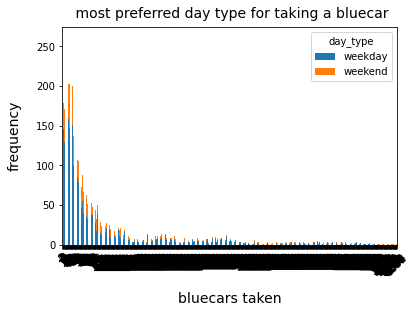

In [ ]:
# Checking which day type blue cars are mostly taken
df_autolib.groupby('day_type')['bluecars_taken_sum'].value_counts().unstack(level=0).plot(kind='bar', stacked='True').plot(kind='bar', stacked='True')

labels = df_autolib.groupby('day_type')['bluecars_taken_sum'].value_counts(normalize=True)
print(labels)
# # Rotating our x axis ticks
plt.xticks(rotation = 45)

# # Giving our chart a title
plt.title(" most preferred day type for taking a bluecar", fontsize=14, y=1.015)

# # Labeling our y axis
plt.ylabel("frequency", fontsize=14, labelpad=15)

# # Labeling our x axis
plt.xlabel("bluecars taken", fontsize=14, labelpad=15)

# # Displaying our chart
plt.show()

# Hypothesis Testing

## Normality tests using Shapiro

In [ ]:
# imporing the shapiro function
from scipy.stats import shapiro

stat, p = shapiro(df_autolib['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' %(stat, p))

alpha=0.05
if p>alpha:
  print('sample looks Gaussian')
else:
    print('sample does not look Gaussian')

Statistics=0.661, p=0.000
sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
stat, p = shapiro(df_autolib['bluecars_returned_sum'])
print('Statistics=%.3f, p=%.3f' %(stat, p))

alpha=0.05
if p>alpha:
  print('sample looks Gaussian')
else:
    print('sample does not look Gaussian')

Statistics=0.660, p=0.000
sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# hypothesis
#Is the number of bluecars taken in area X different than in area Y?

In [ ]:
#Postal codes 75015 vs 75017

In [ ]:
df_autolib_weekday = df_autolib[df_autolib['day_type'] == "weekday"]
df_autolib_weekend = df_autolib[df_autolib['day_type'] == "weekend"]

In [ ]:
df_autolib_weekday_X = df_autolib_weekday[(df_autolib_weekday['postal_code']==75015)]
df_autolib_weekday_X.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
2184,75015,1/1/2018,1440,0,weekday,781,843
2185,75015,1/2/2018,1438,1,weekday,710,720
2186,75015,1/3/2018,1439,2,weekday,739,752
2187,75015,1/4/2018,1320,3,weekday,669,644
2188,75015,1/5/2018,1440,4,weekday,852,846


In [ ]:
df_autolib_weekday_Y = df_autolib_weekday[df_autolib_weekday['postal_code']==75017]
df_autolib_weekday_Y.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum
2496,75017,1/1/2018,1440,0,weekday,634,671
2497,75017,1/2/2018,1438,1,weekday,548,542
2498,75017,1/3/2018,1439,2,weekday,638,616
2499,75017,1/4/2018,1320,3,weekday,553,534
2500,75017,1/5/2018,1440,4,weekday,705,703


In [27]:
#Calculate the p_value and t_statistic for X and Y
from scipy.stats import ttest_ind
X = df_autolib_weekday_X['bluecars_taken_sum']
Y = df_autolib_weekday_Y['bluecars_taken_sum']

t_statistic, p_value = ttest_ind(X, Y)
print(f"p_value:{p_value}")
print(f"t_statistic:{t_statistic}")

if p_value <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p_value:3.002886655703988e-17
t_statistic:9.184511095694013
we reject null hypothesis
